<center>
<img src='https://community.nasscom.in/sites/default/files/media/images/NLP-image.jpg' width=800 height=500 />
</center>

### Loading necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
import nltk


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC



<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#6666ff; border-radius:8px; padding:2px; font-size:24px; width:400px; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-webkit-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-moz-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);'  >
            <div>
            <font> Import data
            </font>
        </div>
    </h1>
</div>

In [2]:
train_df = pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [3]:
train_df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#6666ff; border-radius:8px; padding:2px; font-size:24px; width:400px; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-webkit-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-moz-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);'  >
            <div>
            <font> Dataset Info
            </font>
        </div>
    </h1>
</div>

### Shape of Train and Test dataset

In [4]:
print(f'Train dataset shape : {train_df.shape}')
print('--'*20)
print(f'Test dataset shape : {test_df.shape}')

Train dataset shape : (7613, 5)
----------------------------------------
Test dataset shape : (3263, 4)


### Features in Train and Test dataset

In [5]:
print(f'Train data : {train_df.columns}')
print('----'*20)
print(f'Test data : {test_df.columns}')

Train data : Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
--------------------------------------------------------------------------------
Test data : Index(['id', 'keyword', 'location', 'text'], dtype='object')


<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#6666ff; border-radius:8px; padding:2px; font-size:24px; width:400px; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-webkit-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-moz-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);'  >
            <div>
            <font> Exploratory Data Analysis
            </font>
        </div>
    </h1>
</div>

### Checking duplicated text for both Train and Test dataset

In [6]:
print('The number of dublicated data in Train dataset :' ,train_df.duplicated(['text']).sum())
print('---'*20)
print('The number of dublicated data in Test dataset : ', train_df.duplicated(['text']).sum())


The number of dublicated data in Train dataset : 110
------------------------------------------------------------
The number of dublicated data in Test dataset :  110


### Removing duplicated texts from both Train and Test dataset

In [7]:
train_df.drop_duplicates(["text", "target"], inplace=True)
test_df.drop_duplicates(["text"], inplace=True)

### Checking dtypes for both Train and Test dataset

In [8]:
print(f'Train features dtypes \n{train_df.dtypes}')
print('-'*20)
print(f'Test features dtypes \n{test_df.dtypes}')

Train features dtypes 
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object
--------------------
Test features dtypes 
id           int64
keyword     object
location    object
text        object
dtype: object


### Missing values in Train dataset

In [9]:
print("Missin values in Train dataset : ")
null_data = train_df.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = train_df.isnull().sum() * 100 / len(train_df)
null_data.style

Missin values in Train dataset : 


,Miss values,Miss values percentage %
id,0,0.000000
keyword,56,0.744582
location,2490,33.107300
text,0,0.000000
target,0,0.000000


### Missing values in Test dataset

In [10]:
print("Missin values in Test dataset : ")
null_data = test_df.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = round(test_df.isnull().sum() * 100 / len(train_df),2)
null_data.style

Missin values in Test dataset : 


,Miss values,Miss values percentage %
id,0,0.000000
keyword,26,0.350000
location,1097,14.590000
text,0,0.000000


In [11]:
train_df.target.value_counts()

0    4315
1    3206
Name: target, dtype: int64

### Showing target feature percentage 

<AxesSubplot:xlabel='target', ylabel='count'>

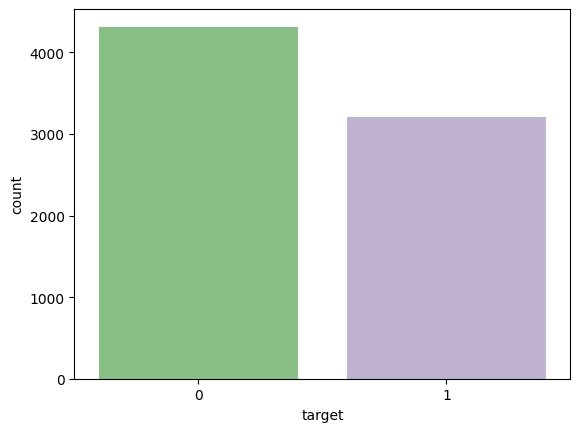

In [12]:
# plt.figure(figsize=(6,4))
# plt.pie(train_df["target"].value_counts(), labels= train_df["target"].value_counts().keys(),autopct='%1.1f%%')
# plt.title('Target values distribution')
# plt.show()
sns.countplot(data = train_df, x ='target',palette='Accent' )

### Showing Top Ten Keywords (Used)

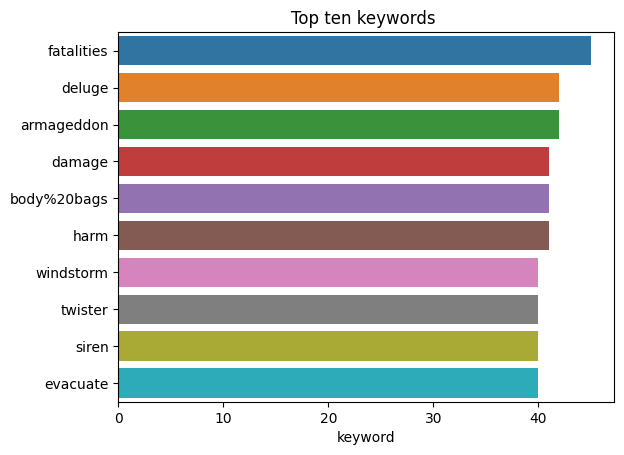

In [13]:
sns.barplot(y=train_df['keyword'].value_counts()[:10].index,x=train_df['keyword'].value_counts()[:10],
            orient='h')
plt.title("Top ten keywords ")
plt.show()

<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#6666ff; border-radius:8px; padding:2px; font-size:24px; width:400px; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-webkit-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-moz-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);'  >
            <div>
            <font> Data Preprocessing
            </font>
        </div>
    </h1>
</div>

<font font size = '6px' color = '#b366ff'>Text Cleaning using Regex</font>

In [14]:
def preprocessing(text):
    
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text 

train_df['text']=train_df['text'].apply(lambda x :preprocessing(x))
test_df['text']=test_df['text'].apply(lambda x :preprocessing(x))

In [15]:
train_df['text'].sample(10)

1600    warne ponting shocked by australian collapse  ...
5503    officials alabama home quarantined over possib...
6645    shipsxanchors idek how is  there people who ac...
7093    terrifying pov footage captures violent landin...
6834    hollywood movie about trapped miners released ...
3080            tries to electrocute self with phone cord
1159    japan marks  anniversary of hiroshima atomic b...
1196    im a gemini children screaming buildings burni...
3142    newyorkcity for the international emergency me...
6548    how would i have survived without the mute opt...
Name: text, dtype: object

In [16]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


<font font size = '6px' color = '#b366ff'>Tokenization process</font>

In [17]:
Tokenizer=RegexpTokenizer(r'\w+')
train_df['text']=train_df['text'].apply(lambda x : Tokenizer.tokenize(x))
test_df['text']=test_df['text'].apply(lambda x : Tokenizer.tokenize(x))

In [18]:
train_df.sample(10)

,id,keyword,location,text,target
1840,2645,crashed,NaN,"[i, crashed, my, car, into, a, parked, car, th...",0
4549,6466,injured,USA,"[offers, deluxe, toilet, safety, supporthealth...",1
2826,4062,displaced,NaN,"[philippines, must, protect, internally, displ...",1
4026,5717,forest%20fire,"Redding, California, USA","[ashenforest, floorburnt, manzanita, amp, timb...",1
2268,3252,deluged,Aro Diaspora,"[theyve, come, back, gtgt, flying, ant, day, c...",1
5305,7578,outbreak,The Netherlands,"[families, to, sue, over, legionnaires, more, ...",1
5887,8408,sandstorm,"Hamilton County, IN","[sandstorm, woo, hoo]",1
4328,6147,hijack,NaN,"[ive, just, posted, on, my, blog, about, crimi...",1
265,383,annihilation,Connecticut,"[sonofbaldwin, and, hes, the, current, nova, i...",0
6692,9589,thunder,NaN,"[i, hear, lightening, and, see, thunder]",1


<font font size = '6px' color = '#b366ff'>lemmatization processing and pasting words together</font>

In [19]:

# lemmatizer = WordNetLemmatizer() we can use lemmatizer 
Stemmer = PorterStemmer()
def stopwords_cleaner(text):

    stopwords_list = stopwords.words('english')
    # word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    filtered_token = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    return ' '.join(filtered_token)
    


train_df['text'] = train_df['text'].apply(lambda x : stopwords_cleaner(x))
test_df['text'] = test_df['text'].apply(lambda x : stopwords_cleaner(x))

In [20]:
train_df['text'].sample(10)

4991           reason love women militari lulgzimbestpict
7559                           exot car wreck train accid
2398    realdonaldtrump rushlimbaugh proof democrat af...
6768    calgari area tornado warn end thunderstorm mov...
6995      ellenfromnowon nexu shifter å commun cargo bike
1901                        crush mile run tonight awesom
2142    eazzyp never know would happen govt seem think...
7449    wound kiss someon doesnt see disast soul rathe...
5467    reddit updat content polici promis quarantin û...
6635    fresh encount pulwama jampampk one terrorist k...
Name: text, dtype: object

<font font size = '6px' color = '#b366ff'> Using CounterVectorizer on our text</font>

In [21]:
count_vectorizer=CountVectorizer()
train_vectors=count_vectorizer.fit_transform(train_df['text'])

test_vectors = count_vectorizer.transform(test_df["text"])


print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


<div style = 'display:flex; justify-content:center'>   
    <h1 align = 'center'> 
        <div style = 'background:#6666ff; border-radius:8px; padding:2px; font-size:24px; width:400px; color:white; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-webkit-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
-moz-box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);'  >
            <div>
            <font> Model Building
            </font>
        </div>
    </h1>
</div>

### Spliting data to train and test (CounterVectorizer)

In [22]:
X_train , X_test , y_train , y_test  = train_test_split(train_vectors , train_df['target'] , test_size=0.1 , random_state=1)


### Using TfidfVectorizer on our text

In [23]:
tfidf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))

train_tfidf=tfidf.fit_transform(train_df['text'])
test_tfidf = tfidf.transform(test_df["text"])

### Spliting data to train and test (TF_IDF)

In [24]:
X_test_tf , X_train_tf , y_test_tf , y_train_tf = train_test_split(train_tfidf , train_df['target'] , test_size=0.1 , random_state=1)

In [25]:
training_score_vectorizer=[]
testing_score_vectorizer =[]

def model_prediction(model):
    model.fit(X_train,y_train)
    x_train_pred = model.predict(X_train)
    x_test_pred = model.predict(X_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score_vectorizer.append(a)
    testing_score_vectorizer .append(b)
    model_name = str(model).split('(')[0]
    print(f"Accuracy_Score of {model_name} model on Training Data is:",a)
    print(f"Accuracy_Score of {model_name} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model_name} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model_name} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model_name} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model_name} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(6,3))
    sns.heatmap(cm,annot=True,fmt="g",cmap="PiYG")
    plt.show()

Accuracy_Score of LogisticRegression model on Training Data is: 95.13888888888889
Accuracy_Score of LogisticRegression model on Testing Data is: 80.34528552456838

------------------------------------------------------------------------
Precision Score of LogisticRegression model is: 0.8082191780821918
Recall Score of LogisticRegression model is: 0.7195121951219512
F1 Score of LogisticRegression model is: 0.7612903225806452

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression model is:


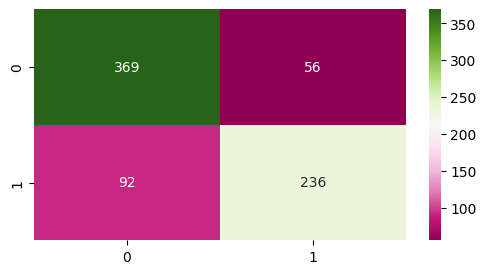

In [26]:
LogesticReg_CounetrVectorizer=LogisticRegression()
model_prediction(LogesticReg_CounetrVectorizer)

Accuracy_Score of RandomForestClassifier model on Training Data is: 98.72931442080379
Accuracy_Score of RandomForestClassifier model on Testing Data is: 78.88446215139442

------------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.8118081180811808
Recall Score of RandomForestClassifier model is: 0.6707317073170732
F1 Score of RandomForestClassifier model is: 0.7345575959933222

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


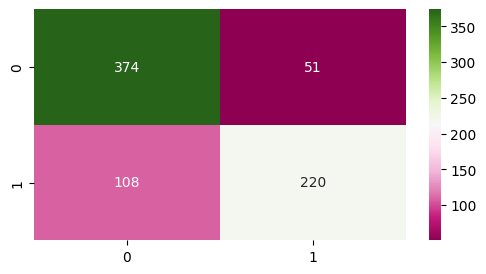

In [27]:
RandomForset_CounterVectorizer=RandomForestClassifier(n_estimators=100)
model_prediction(RandomForset_CounterVectorizer)

Accuracy_Score of MultinomialNB model on Training Data is: 90.51418439716312
Accuracy_Score of MultinomialNB model on Testing Data is: 79.4156706507304

------------------------------------------------------------------------
Precision Score of MultinomialNB model is: 0.7873754152823921
Recall Score of MultinomialNB model is: 0.7225609756097561
F1 Score of MultinomialNB model is: 0.753577106518283

------------------------------------------------------------------------
Confusion Matrix of MultinomialNB model is:


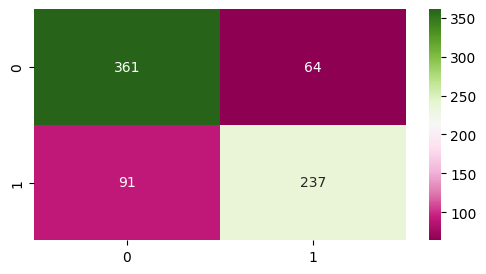

In [28]:
Gussian_CounterVectorizer=MultinomialNB()
model_prediction(Gussian_CounterVectorizer)

Accuracy_Score of SVC model on Training Data is: 94.59219858156028
Accuracy_Score of SVC model on Testing Data is: 81.27490039840637

------------------------------------------------------------------------
Precision Score of SVC model is: 0.8582375478927203
Recall Score of SVC model is: 0.6829268292682927
F1 Score of SVC model is: 0.7606112054329373

------------------------------------------------------------------------
Confusion Matrix of SVC model is:


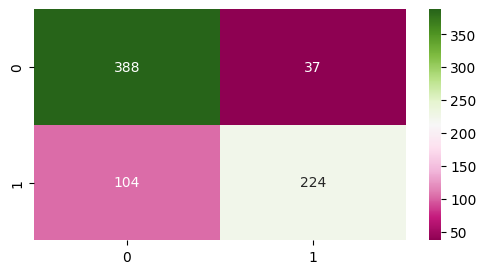

In [29]:
SVC_CounterVectorizer=SVC()
model_prediction(SVC_CounterVectorizer)

### Observing all models Performance for CounterVectorizer

In [30]:
models_vectorizer = ["Logistic Regression","Random Forest","Naive Bayes","SVM"
          ]

In [31]:
df_vectorizer = pd.DataFrame({"Algorithms":models_vectorizer,
                   "Training Score":training_score_vectorizer,
                   "Testing Score":testing_score_vectorizer})

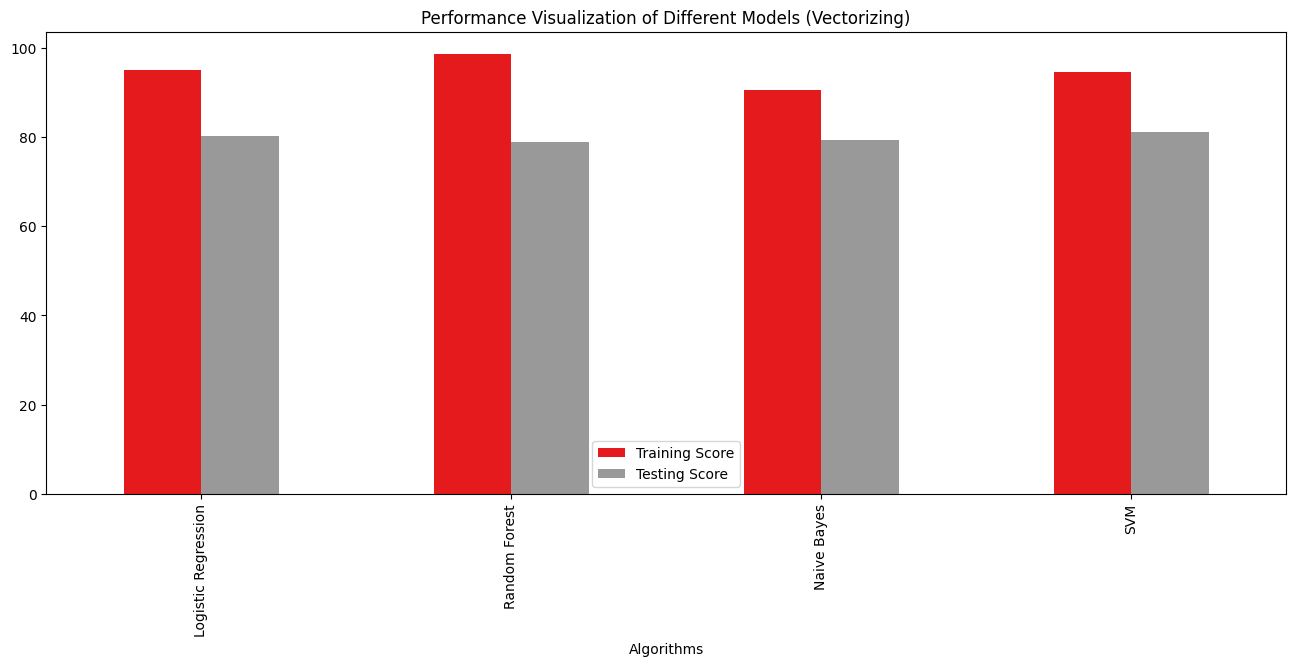

In [32]:
df_vectorizer.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (Vectorizing)",colormap="Set1")
plt.show()

In [33]:
training_score_tf =[]
testing_score_tf =[]

def model_prediction_tf(model):
    model.fit(X_train_tf,y_train_tf)
    x_train_pred = model.predict(X_train_tf)
    x_test_pred = model.predict(X_test_tf)
    a = accuracy_score(y_train_tf,x_train_pred)*100
    b = accuracy_score(y_test_tf,x_test_pred)*100
    training_score_tf.append(a)
    testing_score_tf.append(b)
    model_name = str(model).split('(')[0]
    print(f"Accuracy_Score of {model_name} model on Training Data is:",a)
    print(f"Accuracy_Score of {model_name} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model_name} model is:",precision_score(y_test_tf,x_test_pred))
    print(f"Recall Score of {model_name} model is:",recall_score(y_test_tf,x_test_pred))
    print(f"F1 Score of {model_name} model is:",f1_score(y_test_tf,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model_name} model is:")
    cm = confusion_matrix(y_test_tf,x_test_pred)
    plt.figure(figsize=(6,3))
    sns.heatmap(cm,annot=True,fmt="g",cmap="PiYG")
    plt.show()

Accuracy_Score of LogisticRegression model on Training Data is: 95.0863213811421
Accuracy_Score of LogisticRegression model on Testing Data is: 70.99586288416076

------------------------------------------------------------------------
Precision Score of LogisticRegression model is: 0.8565861262665627
Recall Score of LogisticRegression model is: 0.381862404447533
F1 Score of LogisticRegression model is: 0.5282384042297524

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression model is:


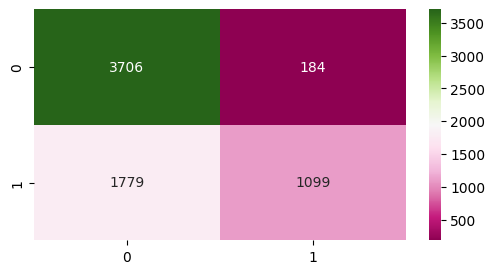

In [34]:
LogesticReg_tf=LogisticRegression()
model_prediction_tf(LogesticReg_tf)

Accuracy_Score of RandomForestClassifier model on Training Data is: 99.33598937583001
Accuracy_Score of RandomForestClassifier model on Testing Data is: 69.06028368794325

------------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.8361921097770154
Recall Score of RandomForestClassifier model is: 0.3387769284225156
F1 Score of RandomForestClassifier model is: 0.4821958456973293

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


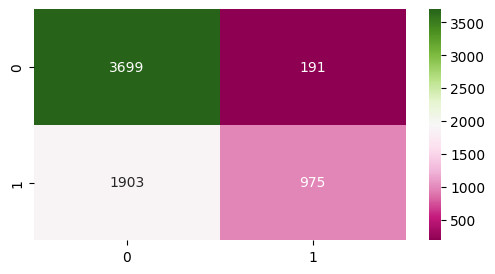

In [35]:
RandomForset_tf=RandomForestClassifier(n_estimators=100)
model_prediction_tf(RandomForset_tf)

Accuracy_Score of MultinomialNB model on Training Data is: 95.61752988047809
Accuracy_Score of MultinomialNB model on Testing Data is: 72.78368794326241

------------------------------------------------------------------------
Precision Score of MultinomialNB model is: 0.8213399503722084
Recall Score of MultinomialNB model is: 0.4600416956219597
F1 Score of MultinomialNB model is: 0.5897550111358574

------------------------------------------------------------------------
Confusion Matrix of MultinomialNB model is:


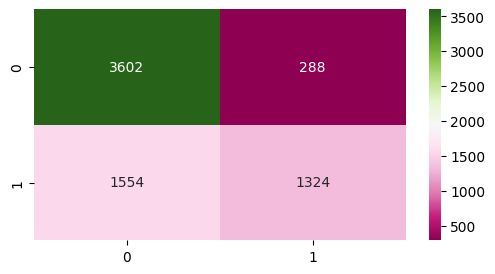

In [36]:
Gussian_tf=MultinomialNB()
model_prediction_tf(Gussian_tf)

Accuracy_Score of SVC model on Training Data is: 99.20318725099602
Accuracy_Score of SVC model on Testing Data is: 69.13416075650119

------------------------------------------------------------------------
Precision Score of SVC model is: 0.8863858961802155
Recall Score of SVC model is: 0.3144544822793607
F1 Score of SVC model is: 0.4642215952808413

------------------------------------------------------------------------
Confusion Matrix of SVC model is:


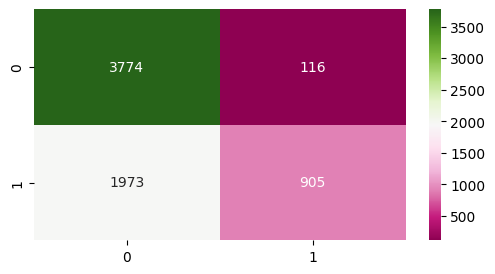

In [37]:
SVC_tf=SVC()
model_prediction_tf(SVC_tf)

### Observing all models Performance fot TF_IDF

In [38]:
models_tf = ["Logistic Regression","Random Forest","Naive Bayes","SVM"
          ]

In [39]:
df_tf = pd.DataFrame({"Algorithms":models_tf,
                   "Training Score":training_score_tf,
                   "Testing Score":testing_score_tf})

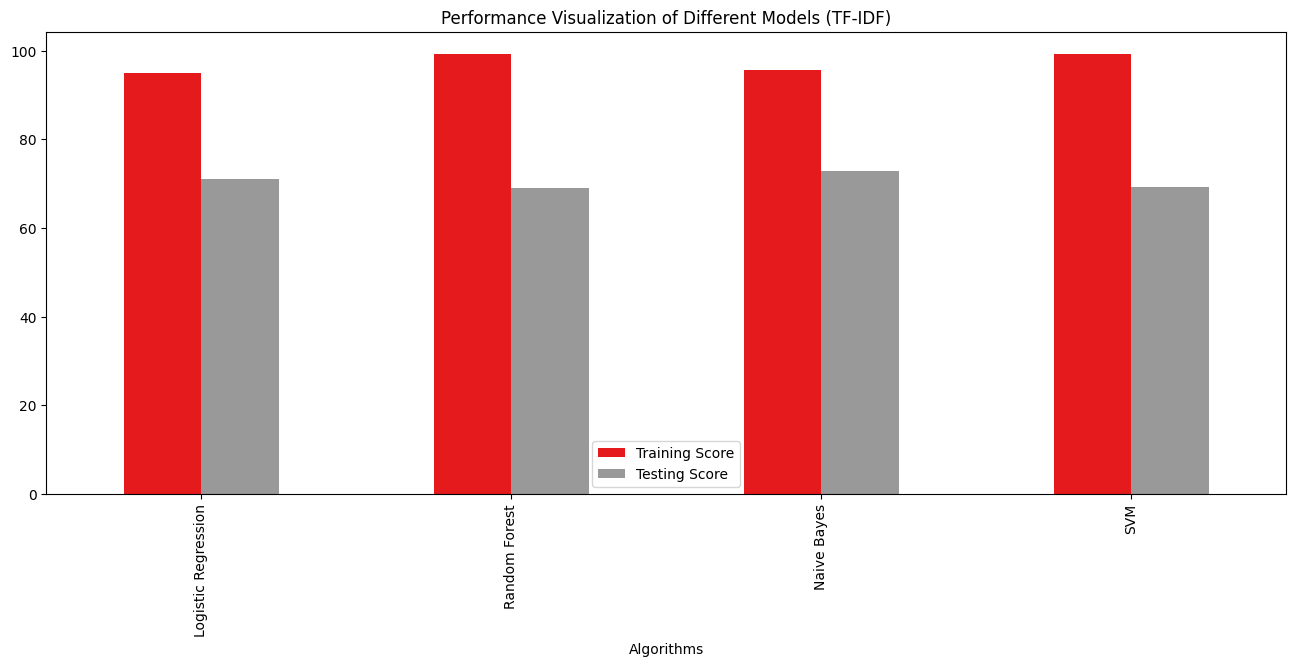

In [40]:
df_tf.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (TF-IDF)",colormap="Set1")
plt.show()